In [7]:
import numpy as np
import random

#strike
K = 99

#Volatility
vol = 0.20

#Stock Price t=0
s_0 = 100

#Interest rate
r = 0.06


#Time to maturity is one year
T = 1

steps = 10000

#time steps
dt = T/steps

#Up and down movements for the given volatility
up_val = np.exp(vol*np.sqrt(dt))
down_val = np.exp(-vol*np.sqrt(dt))

#Probability of movement
p = (np.exp(r*dt) - down_val)/(up_val - down_val)


In [8]:
#Final price of stock
def fin_stock_price(s_0, power):
    return s_0*(np.exp(vol*np.sqrt(dt))**(power))

#Price of option at expiration
def expiration_option_price(K, s_T):
    return max(0, K - s_T)

def fair_value(r, dt, p, prev_fair_val_1, prev_fair_val_2):
    return np.exp(-r*dt)*(p*(prev_fair_val_1) + (1 - p)*prev_fair_val_2)


In [9]:
row_list = []

def calculate_prev_row():
    row_values = []
    #print(len(row_list))
    prev_row_values = row_list[len(row_list) - 1]
    for i in range(len(prev_row_values) -1):
        #print(i)
        fv = fair_value(r, dt, p, prev_row_values[i], prev_row_values[i+1])
        row_values.append(fv)
    row_list.append(row_values)

    
def option_pricer(steps):
    dt = T/steps
    #row_list = []
    leaf_nodes = []
    for i in range(-steps, steps+1, 2):
        s_T = fin_stock_price(s_0, i)
        end_option_price = expiration_option_price(K, s_T)
        leaf_nodes.append(end_option_price)
    row_list.append(leaf_nodes)




    for i in range(steps):
        calculate_prev_row()

    return row_list[-1][0]
    
option_pricer(steps)
    


7.860736798724277

# Convergence of method as steps increases

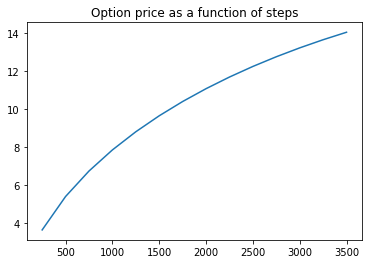

In [6]:
import matplotlib.pyplot as plt

xlist = [i*250 for i in range(1, 15)]
ylist = [option_pricer(i*250) for i in range(1, 15)]

plt.figure()
plt.title('Option price as a function of steps')
plt.plot(xlist, ylist)

# Compute the hedge parameter

# American Option